In [1]:
import tensorflow as tf 
tf.config.optimizer.set_jit(False)
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

print(tf.__version__)

2.17.0


In [2]:
import tensorflow as tf
import torch

print("=== TensorFlow ===")
print("GPU Available ✔️" if tf.config.list_physical_devices('GPU') else "GPU NOT Available ❌")

print("\n=== PyTorch ===")
print("GPU Available ✔️" if torch.cuda.is_available() else "GPU NOT Available ❌")
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))


=== TensorFlow ===
GPU Available ✔️

=== PyTorch ===
GPU Available ✔️
NVIDIA GeForce RTX 5070 Ti Laptop GPU


In [3]:
X = tf.range(-10, 10, delta=3, dtype=tf.float32)
y = tf.range(0, 20, delta=3, dtype=tf.float32)

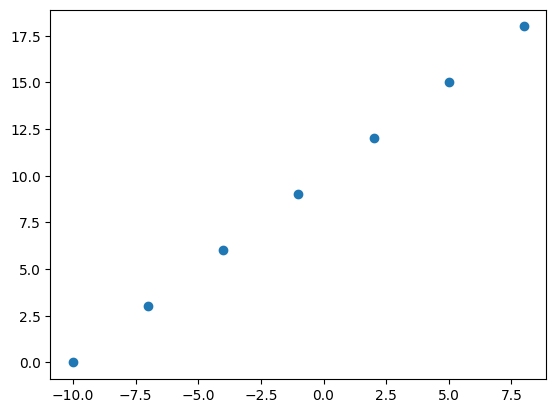

In [4]:
plt.scatter(X, y)

In [5]:
y == X + 50

<tf.Tensor: shape=(7,), dtype=bool, numpy=array([False, False, False, False, False, False, False])>

In [6]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([975350])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([975350], dtype=int32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [8]:
X[0].ndim, y[0].ndim

(0, 0)

In [9]:
# Set random sreversed
tf.random.set_seed(42)

# 2. Create a model using the Sequential Apiabs

model = tf.keras.Sequential([
    # tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 3. Compile the mmodel

# model.compile(loss=tf.keras.losses.mae,
#              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
#              metrics=['mae', 'mse'])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['mae', 'mse'])

# 4. Fit the model 

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 9.2303 - mae: 9.2303 - mse: 124.2648
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9454 - mae: 8.9454 - mse: 113.0814
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 8.8890 - mae: 8.8890 - mse: 109.4449
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7745 - mae: 8.7745 - mse: 108.5842
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 8.6986 - mae: 8.6986 - mse: 109.4580
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.5953 - mae: 8.5953 - mse: 106.8248
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.5007 - mae: 8.5007 - mse: 102.2936
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 8.4223 - mae: 8.4223 - mse: 99.3282
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 8.3140 - mae: 8.3140 - mse: 97.4763
Epoch 10/100
1/1 [=============

In [10]:
model.predict([10])

1/1 [==============================] - 0s 56ms/step


array([[20.31246]], dtype=float32)

In [11]:
X

<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-10.,  -7.,  -4.,  -1.,   2.,   5.,   8.], dtype=float32)>

# Common ways to improve a deep model

1. Adding layers
2. Increase the number of hidden units
3. Change the activation functions
4. Change the optimization functions
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer (epochs)

# Evaluating a model
"Visualize, visualize, visualize"

It is a good idea to visualize
1. Data
2. Model itself
3. Training - how does a model while it learns
4. The predictions of the model - predictions vs ground truth

In [12]:
# Work on a bigger data sget_ipython

X = tf.range(-100, 100, delta=4)
y = X + 10 
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

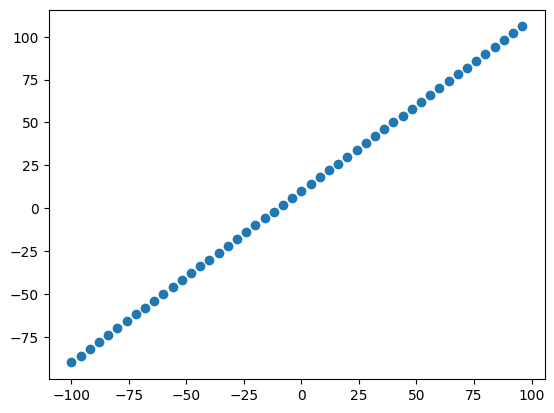

In [13]:
plt.scatter(X, y)

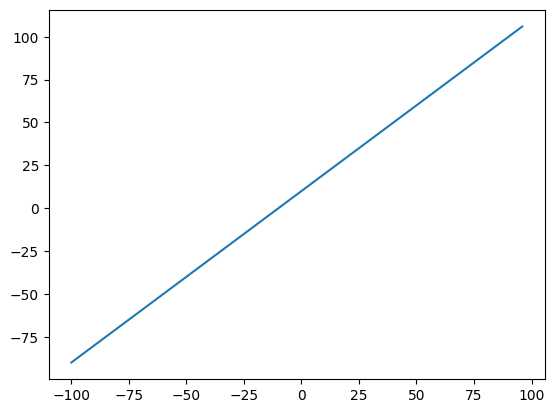

In [14]:
plt.plot(X, y)

# Three sets 
1. Training - %70-%80 
2. Validation Set %10-%15
3. Test Set %10 - %15

In [15]:
# dataset = tf.data.Dataset.from_tensor_slices((X, y))
# dataset = dataset.shuffle(buffer_size=len(X), seed=42)

# train_size = int(0.8 * len(X))
# train_ds = dataset.take(train_size)
# test_ds = dataset.skip(train_size)


In [16]:
from sklearn.model_selection import train_test_split

X_np = X.numpy()
y_np = y.numpy()
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

X_train = tf.constant(X_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32) 
y_train = tf.constant(y_train, dtype=tf.float32) 
y_test = tf.constant(y_test, dtype=tf.float32)

In [17]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50, verbose=0)

In [18]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 79ms/step - loss: 1.7037 - mae: 1.7037 - mse: 4.5036


[1.7037168741226196, 1.7037168741226196, 4.503592491149902]

In [19]:
# Visualize data

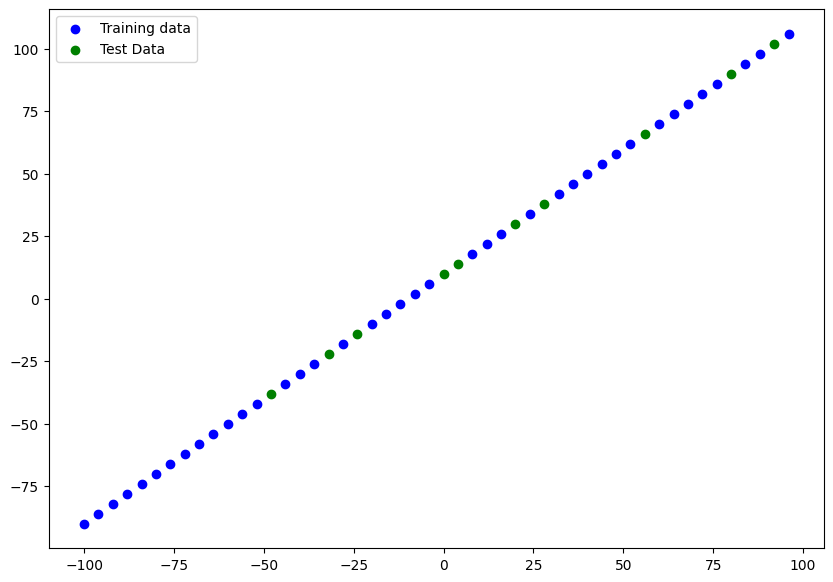

In [20]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label="Training data")
plt.scatter(X_test, y_test, c='g', label="Test Data")
plt.legend();

In [21]:
X_train.shape

TensorShape([40])

In [22]:
# 1 Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
             optimizer=tf.keras.optimizers.SGD(), 
             metrics=['mae', 'mse'])

# # 3. Fit the model 
# model.fit(X_train, y_train, epochs=100)



In [23]:
## 1. Visualize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Create model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    # tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu')
])

model.compile(loss=tf.keras.losses.mae, 
             optimizer=tf.keras.optimizers.SGD(), 
             metrics=['mae', 'mse'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 100)               200       
                                                                 
Total params: 202 (808.00 Byte)
Trainable params: 202 (808.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 100)               200       
                                                                 
Total params: 202 (808.00 Byte)
Trainable params: 202 (808.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 65ms/step - loss: 11.4126 - mae: 11.4126 - mse: 241.7404


[11.41258430480957, 11.41258430480957, 241.74044799804688]

In [28]:
# total_param : total number of parameters in the model 
# trainable parameters : the parameters (patterns) the model update as it trains. 
# non trainable parameters : When we import a pre built/trained model we want to freeze parameters transferred model

In [29]:
# Weights and biases - Trainable/Learnable params

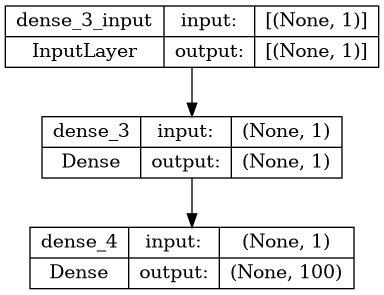

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [31]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

model.compile(loss=tf.keras.losses.mae, 
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
             metrics=['mae'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [33]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 57ms/step - loss: 10.5620 - mae: 10.5620


[10.562029838562012, 10.562029838562012]

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


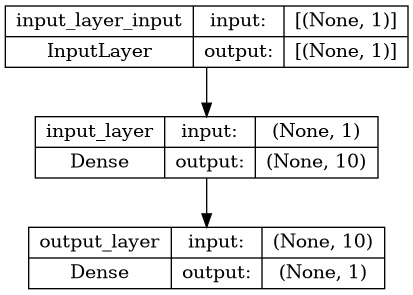

In [35]:
plot_model(model=model, show_shapes=True)

In [36]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 26ms/step


In [37]:
def plot_pred_vs_true(X_train, 
                      y_train, 
                      X_test, 
                      y_true, 
                      y_pred):
    plt.figure(figsize=(10, 7))
    plt.scatter(X_test, y_pred, c='b', label="Predictions")
    plt.scatter(X_test, y_true, c="r", label="Testing Data")
    plt.scatter(X_train, y_train, c='g', label="Training Data")
    plt.legend();

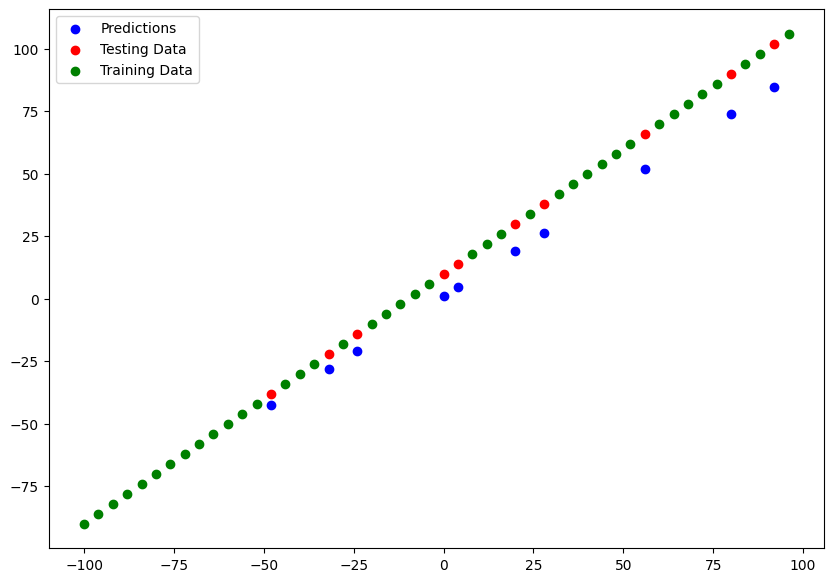

In [38]:
plot_pred_vs_true(X_train, y_train, X_test, y_test, y_pred)

### Evaluating the model's predictions with regression evaluation metrics

There are two main metrics to evaluate a regression model.png

1. Mean absolute error `mae` On average how wrong our predictions
2. MSE - Mean Square Error `mse` Square the avarege error
3. Huber - Combination of MAE and MSE

In [39]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 14ms/step - loss: 10.5620 - mae: 10.5620


[10.562029838562012, 10.562029838562012]

In [40]:
mae = tf.reduce_mean(tf.abs(y_test - tf.constant(y_pred)))
print(mae.numpy())

49.890427


In [41]:
tf.reduce_mean((tf.metrics.mean_absolute_error(y_test, tf.constant(y_pred)))).numpy()

49.890423

In [42]:
y_pred = tf.constant(y_pred)
y_test = tf.reshape(y_test, shape=(10, 1))
y_test, y_pred

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[-38.],
        [ 66.],
        [ 30.],
        [ 90.],
        [-22.],
        [102.],
        [ 14.],
        [ 10.],
        [ 38.],
        [-14.]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[-42.554073 ],
        [ 51.921112 ],
        [ 19.218168 ],
        [ 73.72308  ],
        [-28.019428 ],
        [ 84.62407  ],
        [  4.6835227],
        [  1.0498611],
        [ 26.485489 ],
        [-20.752106 ]], dtype=float32)>)

In [43]:
mae = tf.reduce_mean(tf.abs(y_test - y_pred))
print(mae.numpy())

10.56203


In [44]:
(tf.metrics.mean_absolute_error(y_test, y_pred)).numpy()

array([ 4.5540733, 14.078888 , 10.781832 , 16.276917 ,  6.0194283,
       17.37593  ,  9.316477 ,  8.950139 , 11.514511 ,  6.7521057],
      dtype=float32)

In [45]:
# y_test = tf.reshape(y_test, shape=(10,))
# y_pred = tf.reshape(y_pred, shape=(10,))
y_pred = tf.squeeze(y_pred)
y_test = tf.squeeze(y_test)

y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([-38.,  66.,  30.,  90., -22., 102.,  14.,  10.,  38., -14.],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([-42.554073 ,  51.921112 ,  19.218168 ,  73.72308  , -28.019428 ,
         84.62407  ,   4.6835227,   1.0498611,  26.485489 , -20.752106 ],
       dtype=float32)>)

In [46]:
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=10.56203>

In [47]:
tf.metrics.mean_squared_error(y_pred, y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=128.33737>

In [48]:
huber = tf.keras.losses.Huber()
huber(y_true=y_test, y_pred=y_pred).numpy()

10.06203

## Running experiments to improve the model
1. 1 Layer - 100 epochs
2. 2 layers -- 100 epochs
3. 2 layers -- 500 epochs
4. 2 layers Adam - lr = 0.001 100 Epochs
5. 2 layers Adam - lr = 0.001 500 epochs
6. 2 layers Adam -lr = 0.01 100 epochs

In [49]:
def calculate_mae_mse(y_true=y_test, 
                     y_pred=y_pred):
    return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred)).numpy(), tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred)).numpy()

In [50]:
# model_1

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
], name='model_1')

model_1.compile(loss=tf.keras.losses.mae, 
             optimizer=tf.keras.optimizers.SGD(), 
             metrics=['mae', 'mse'])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [51]:
y_preds_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 23ms/step


In [52]:
y_preds_1

array([[-30.721226 ],
       [ 38.467163 ],
       [ 14.517334 ],
       [ 54.433712 ],
       [-20.076859 ],
       [ 62.41699  ],
       [  3.8729668],
       [  1.2118751],
       [ 19.83952  ],
       [-14.754676 ]], dtype=float32)

In [53]:
mae_1, mse_1 = calculate_mae_mse(y_true=y_test, y_pred=y_preds_1)
mae_1, mse_1

(16.519703, 439.63852)

In [54]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),  # first layer
    tf.keras.layers.Dense(1)                        # output layer
], name='model_2')

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [55]:
y_preds_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 28ms/step


In [56]:
X_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-48.,  56.,  20.,  80., -32.,  92.,   4.,   0.,  28., -24.],
      dtype=float32)>

In [57]:
y_preds_2

array([[-11.696177  ],
       [ 50.76774   ],
       [ 18.469091  ],
       [ 72.30016   ],
       [ -7.6391387 ],
       [ 83.06638   ],
       [  4.114138  ],
       [  0.52540416],
       [ 25.64657   ],
       [ -5.61062   ]], dtype=float32)

In [58]:

mae_2, mse_2 = calculate_mae_mse(y_true=y_test, y_pred=y_preds_2)
mae_2, mse_2

(14.416458, 234.53622)

In [59]:
# model_3 -- 2 layers -- 500 epochs

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
], name='model_3')

model_3.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
               metrics=['mae'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [60]:
y_preds_3 = model_3.predict(X_test)
y_preds_3

1/1 [==============================] - 0s 28ms/step


array([[-41.54655  ],
       [ 64.59228  ],
       [ 23.787584 ],
       [ 91.79542  ],
       [-27.502502 ],
       [105.39699  ],
       [  5.6517105],
       [  1.0607567],
       [ 32.855297 ],
       [-20.48048  ]], dtype=float32)

In [61]:
mae_3, mse_3 = calculate_mae_mse(y_pred=y_preds_3)
mae_3, mse_3

(5.0774317, 31.6263)

In [62]:
#model_4 -->2 layers Adam - lr = 0.001 500 Epochs

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
], name='model_4')

model_4.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
               metrics=['mae'])

model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) 
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               200       
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
y_preds_4 = model_4.predict(X_test)
y_preds_4

1/1 [==============================] - 0s 27ms/step


array([[-37.74132 ],
       [ 65.62433 ],
       [ 29.843906],
       [ 89.477936],
       [-21.838915],
       [101.40473 ],
       [ 13.941501],
       [  9.965899],
       [ 37.795113],
       [-13.88771 ]], dtype=float32)

In [64]:
mae_4, mse_4 = calculate_mae_mse(y_pred=y_preds_4)
mae_4, mse_4

(0.24786386, 0.09444255)

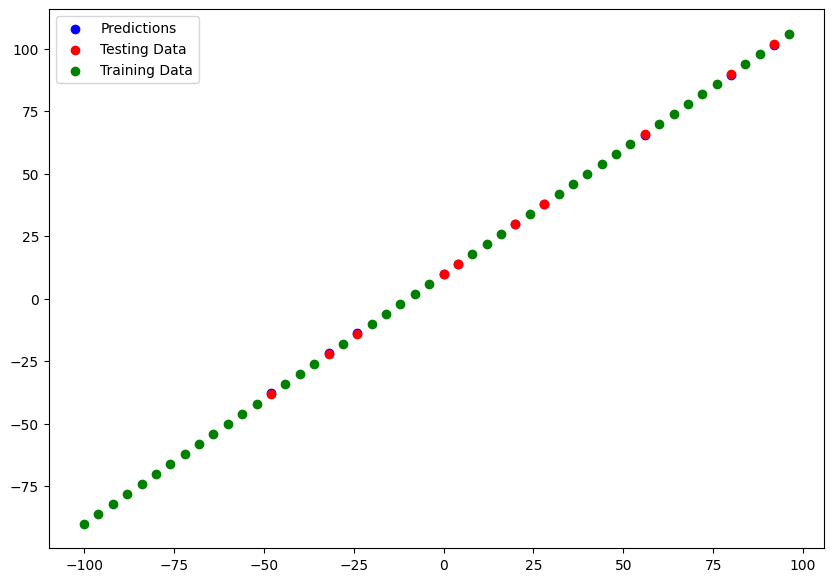

In [65]:
plot_pred_vs_true(X_train=X_train,
                  y_train=y_train,
                 X_test=X_test, 
                 y_true=y_test, 
                 y_pred=y_preds_4)

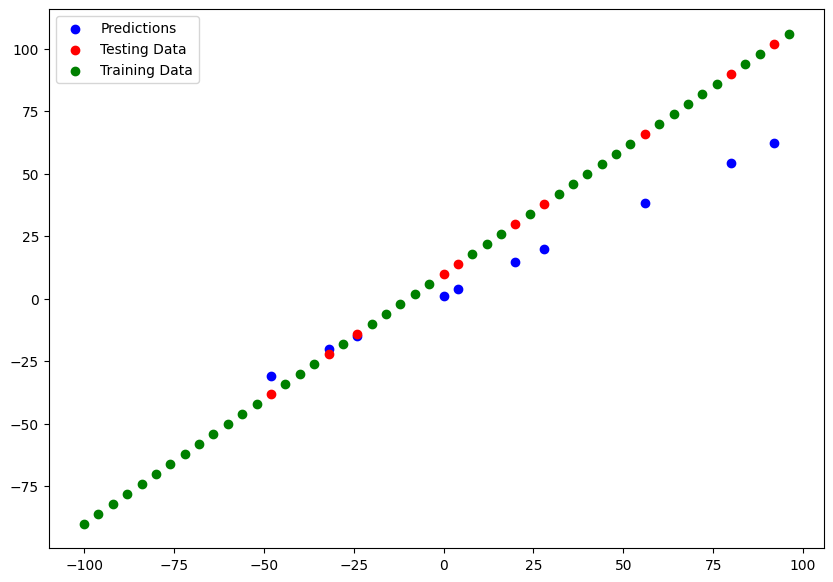

In [66]:
plot_pred_vs_true(X_train=X_train,
                  y_train=y_train,
                 X_test=X_test, 
                 y_true=y_test, 
                 y_pred=y_preds_1)

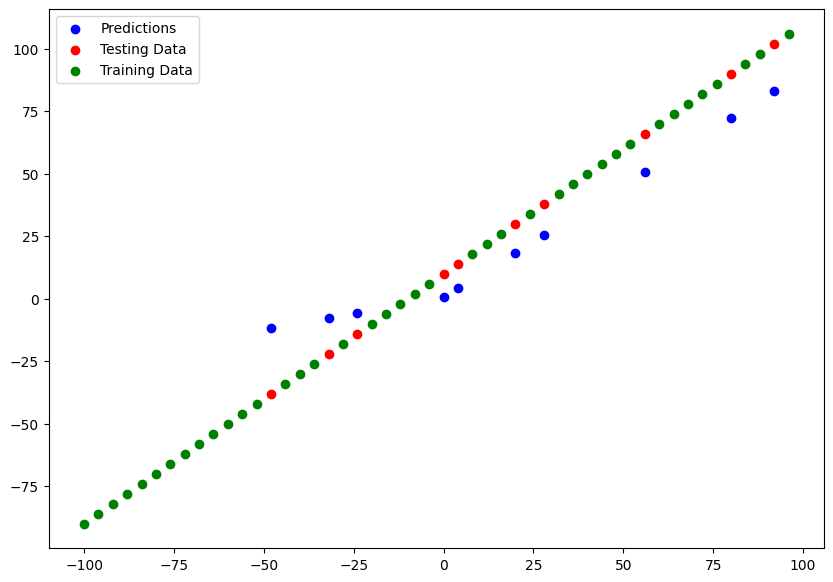

In [67]:
plot_pred_vs_true(X_train=X_train,
                  y_train=y_train,
                 X_test=X_test, 
                 y_true=y_test, 
                 y_pred=y_preds_2)

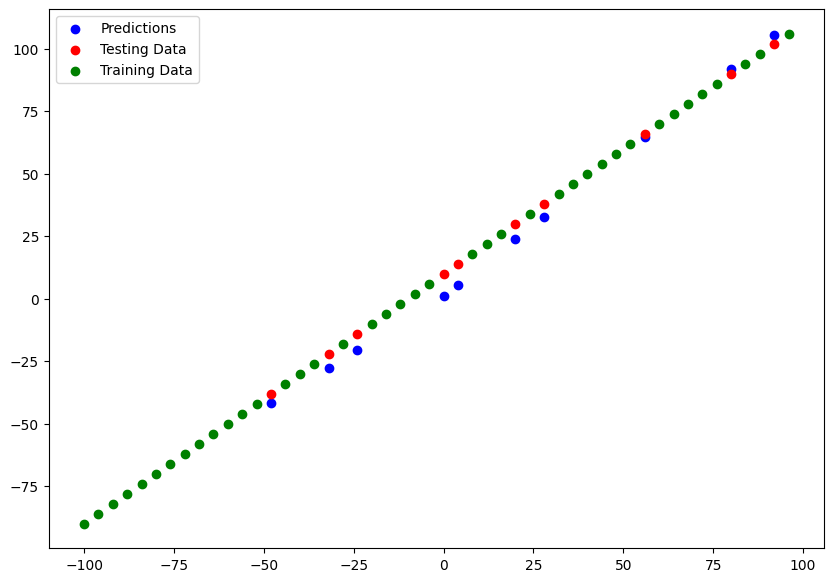

In [68]:
plot_pred_vs_true(X_train=X_train,
                  y_train=y_train,
                 X_test=X_test, 
                 y_true=y_test, 
                 y_pred=y_preds_3)

In [69]:
# model_5 - 2 layers , Adam 0.01, 100 epochs

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(1)
], name='model_5')

model_5.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
               metrics=[
                   tf.keras.metrics.MeanAbsoluteError(name='mae'),
                   tf.keras.metrics.MeanSquaredError(name='mse')
               ])

model_5.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)
model_5.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               200       
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
y_preds_5 = model_5.predict(X_test)
y_preds_5

1/1 [==============================] - 0s 26ms/step


array([[-38.49312 ],
       [ 66.141655],
       [ 29.921928],
       [ 90.288155],
       [-22.395466],
       [102.3614  ],
       [ 13.824267],
       [  9.799852],
       [ 37.970757],
       [-14.346637]], dtype=float32)

In [71]:
mae_5, mse_5 = calculate_mae_mse(y_pred=y_preds_5)
mae_5, mse_5

(0.25096226, 0.08313142)

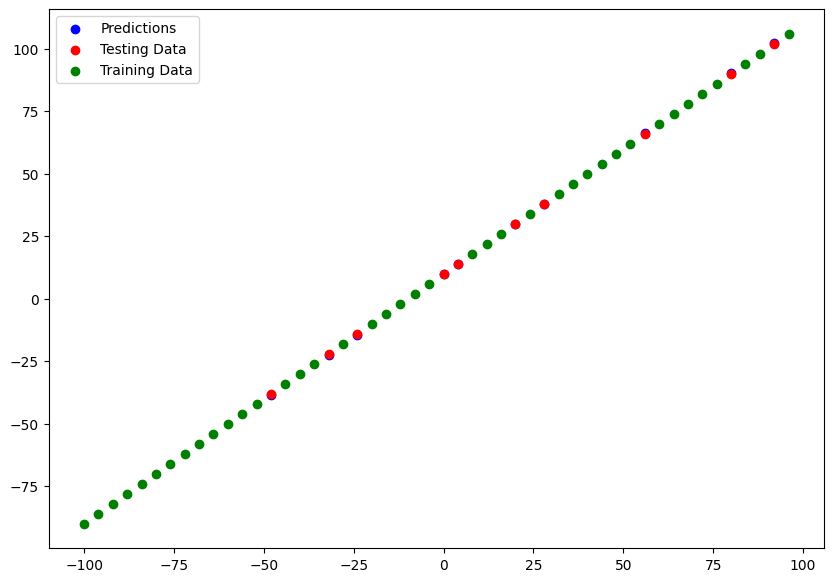

In [72]:
plot_pred_vs_true(X_train=X_train,
                  y_train=y_train,
                 X_test=X_test, 
                 y_true=y_test, 
                 y_pred=y_preds_5)

In [73]:
mae_1, mse_1 = calculate_mae_mse(y_pred=y_preds_1)
mae_2, mse_2 = calculate_mae_mse(y_pred=y_preds_2)
mae_3, mse_3 = calculate_mae_mse(y_pred=y_preds_3)
mae_4, mse_4 = calculate_mae_mse(y_pred=y_preds_4)
mae_5, mse_5 = calculate_mae_mse(y_pred=y_preds_5)

In [74]:
# Comparing the results of the experiments 
# Create a pandas df 

model_results = [
    ['model_1', mae_1, mse_1],
    ['model_2', mae_2, mse_2],
    ['model_3', mae_3, mse_3], 
    ['model_4', mae_4, mse_4], 
    ['model_5', mae_5, mse_5]
]

eval_df = pd.DataFrame(data=model_results, columns=['model', 'mae', 'mse'])

In [75]:
eval_df

,model,mae,mse
0,model_1,16.519703,439.638519
1,model_2,14.416458,234.536224
2,model_3,5.077432,31.626301
3,model_4,0.247864,0.094443
4,model_5,0.250962,0.083131


## Keep track of ecperiments - Tools 

1. **TensorBoard** - a component of the TensorFlow library to help track modelling experiment
2. **Weights & Biases** https://wandb.ai/site/
 

## Saving out models & Using Our Model 

Two formats 
1. SavedModel format  && tf.keras.models.load_model 
2. HDF5 Format 


In [76]:
# Save and load model with SavedModel format 

model_4.save("../models/best_model_SavedModel_format")

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 100), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7da8d8116030>, 138164142792688), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7dabc45e9d30>, 138164140577968), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(100, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7da8bc6e99a0>, 138163670196464), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7da8bc51dd60>, 138163670200688), {}).
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1, 100), dtype=tf

In [77]:
# Save model with HDF5 Format -- We get a single file
model_4.save('../models/best_model_HDF5_format.h5')

In [78]:
loaded_model_saved_model = tf.keras.models.load_model(
    '../models/best_model_SavedModel_format', 
)
loaded_model_saved_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               200       
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
loaded_model_hdf5_format = tf.keras.models.load_model('../models/best_model_HDF5_format.h5') 
loaded_model_hdf5_format.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               200       
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
loaded_model_saved_model.predict(X_test) == loaded_model_hdf5_format.predict(X_test)

1/1 [==============================] - 0s 26ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [81]:
loaded_model_hdf5_format.predict(X_test) == model_4.predict(X_test)

1/1 [==============================] - 0s 16ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [82]:
loaded_model_hdf5_format.evaluate(X_test, y_test) == loaded_model_saved_model.evaluate(X_test, y_test) == model_4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 58ms/step - loss: 0.2479 - mae: 0.2479


True